In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../datasets/Netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [18]:
type(df[['cast']])

pandas.core.frame.DataFrame

In [4]:
# Missing values 
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df[i]) * 100
    if null_rate > 0:
        print('{} null rate: {}%'.format(i,round(null_rate,2)))

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%


<Axes: >

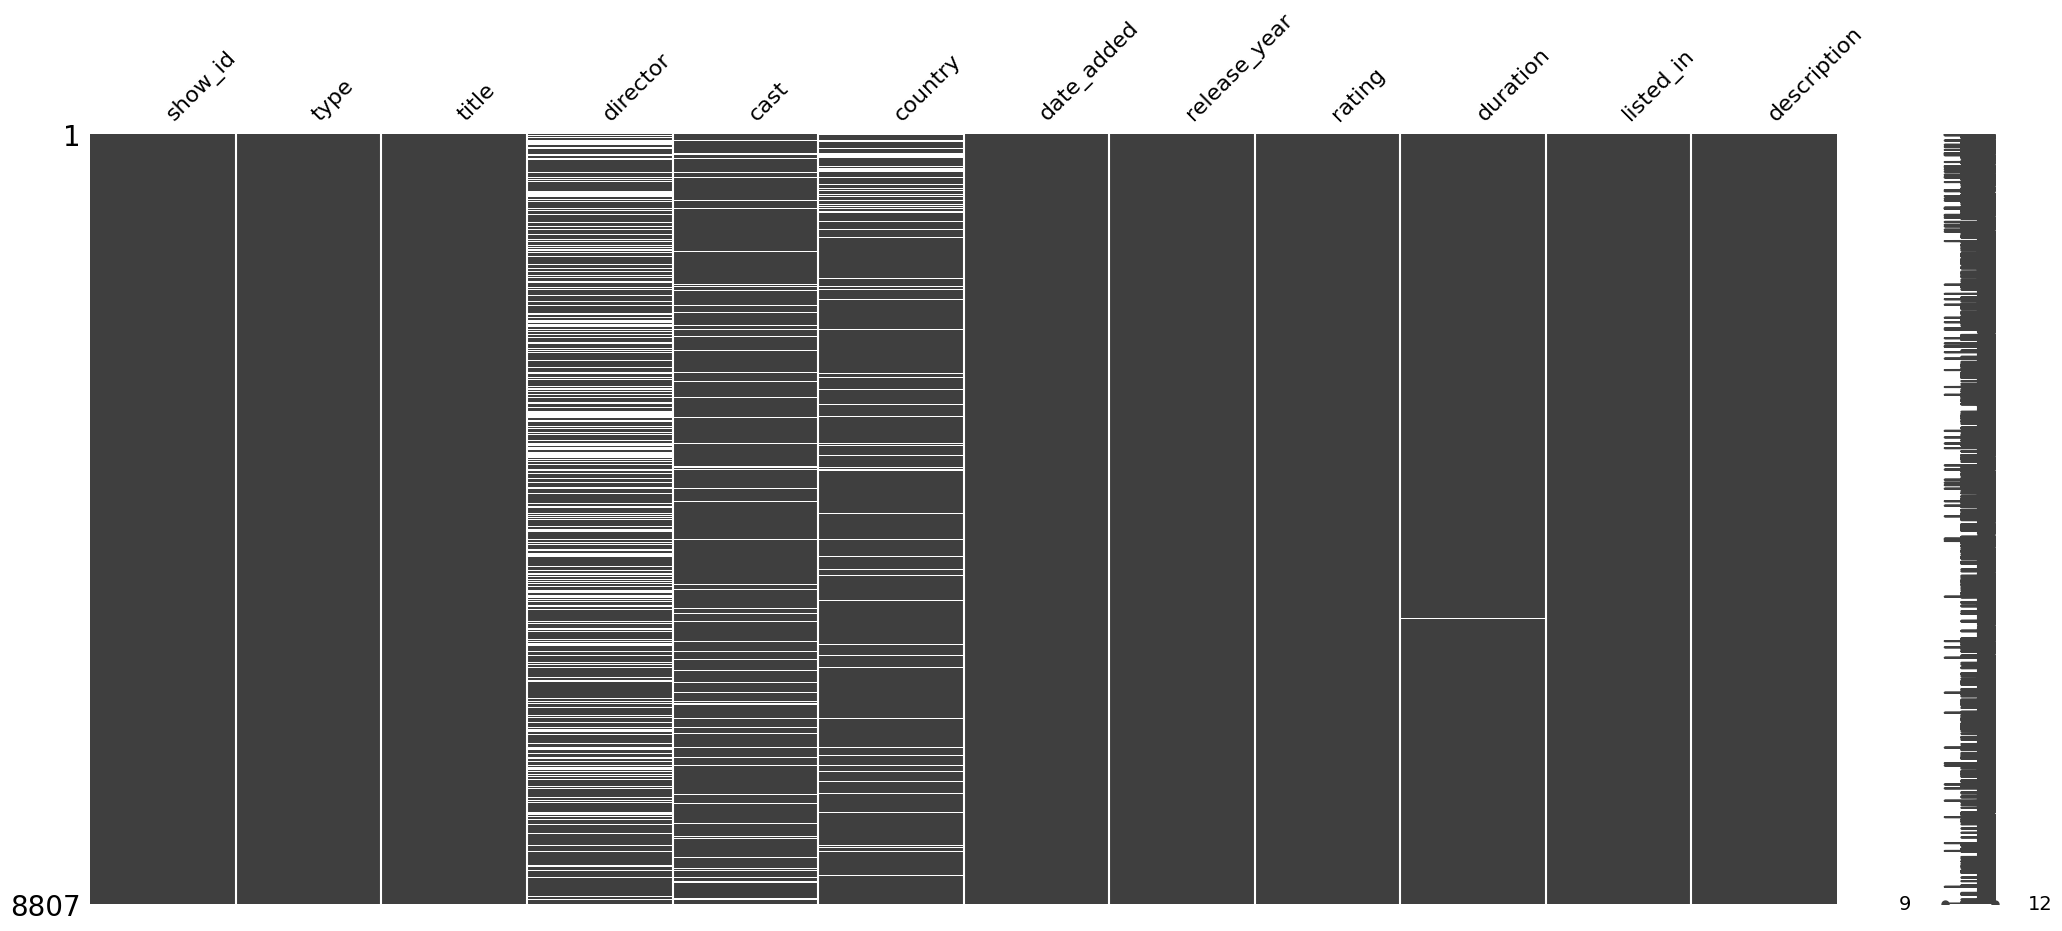

In [5]:
msno.matrix(df)

In [6]:
# Dealing with missing values

# Replacement 
df['country'] = df['country'].fillna(df['country'].mode()[0])

df['cast'] = df['cast'].replace(np.NaN,'No Data')
df['director'] = df['director'].replace(np.NaN,'No Data')

# Drops
df.dropna(inplace=True)

# Drop Duplicateds 
df.drop_duplicates(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


In [8]:
# Fixing some data columns 
df['date_added'] = df['date_added'].map(lambda x:x.strip())
df['date_added'] = pd.to_datetime(df['date_added'])
df['month_added'] = df['date_added'].dt.month
df['month_name_added'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8790 non-null   object        
 1   type              8790 non-null   object        
 2   title             8790 non-null   object        
 3   director          8790 non-null   object        
 4   cast              8790 non-null   object        
 5   country           8790 non-null   object        
 6   date_added        8790 non-null   datetime64[ns]
 7   release_year      8790 non-null   int64         
 8   rating            8790 non-null   object        
 9   duration          8790 non-null   object        
 10  listed_in         8790 non-null   object        
 11  description       8790 non-null   object        
 12  month_added       8790 non-null   int32         
 13  month_name_added  8790 non-null   object        
 14  year_added        8790 non-nu

In [10]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021


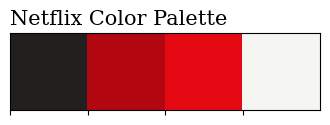

In [11]:
# Using Netfilx color palette
sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])
plt.title('Netflix Color Palette ',loc='left',fontsize=15,fontfamily='serif')
plt.show()

In [12]:
# For viz: ratio of movies & TV shows 
x = df.groupby(['type'])['type'].count()
y = len(df)
r = ((x/y)).round(2)
mf_ratio = pd.DataFrame(r).T

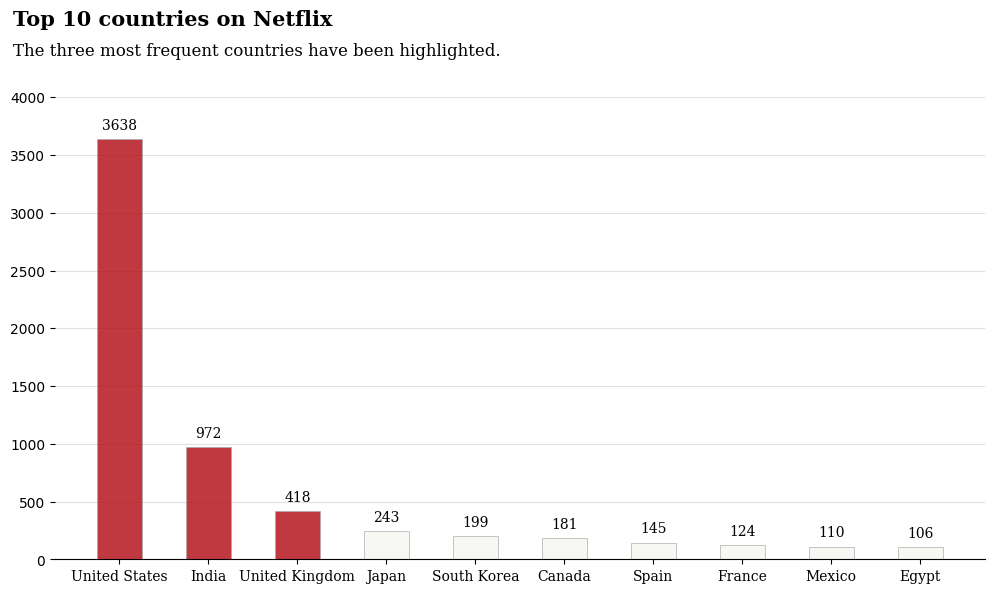

In [89]:
# Top 10 Countries on Netflix
color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#b20710'
data = df.groupby(['country'])['country'].count().sort_values(ascending=False)[:10]


fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data.values, width=0.5, edgecolor='darkgray',linewidth=0.6,color=color_map,alpha=0.8)
ax.set_xticklabels(labels=data.index,fontfamily='serif')

# title & subtitle 
fig.text(0.09, 1, 'Top 10 countries on Netflix',fontsize=15,fontweight='bold',fontfamily='serif')
fig.text(0.09,0.95,'The three most frequent countries have been highlighted.',fontsize=12,fontweight='light',fontfamily='serif')


# set y_ticks
grid_y_ticks = np.arange(0,4500,500) 
ax.set_yticks(grid_y_ticks)

# annotations 
for i in data.index:
    ax.annotate(text=f'{data[i]}',xy=(i,data[i]+120),va='center',ha='center',fontfamily='serif')

# girds
ax.grid(axis='y',linestyle='-',alpha=0.4)
ax.set_axisbelow(True)

for s in ['top','left','right']:
    ax.spines[s].set_visible(False)

plt.show()

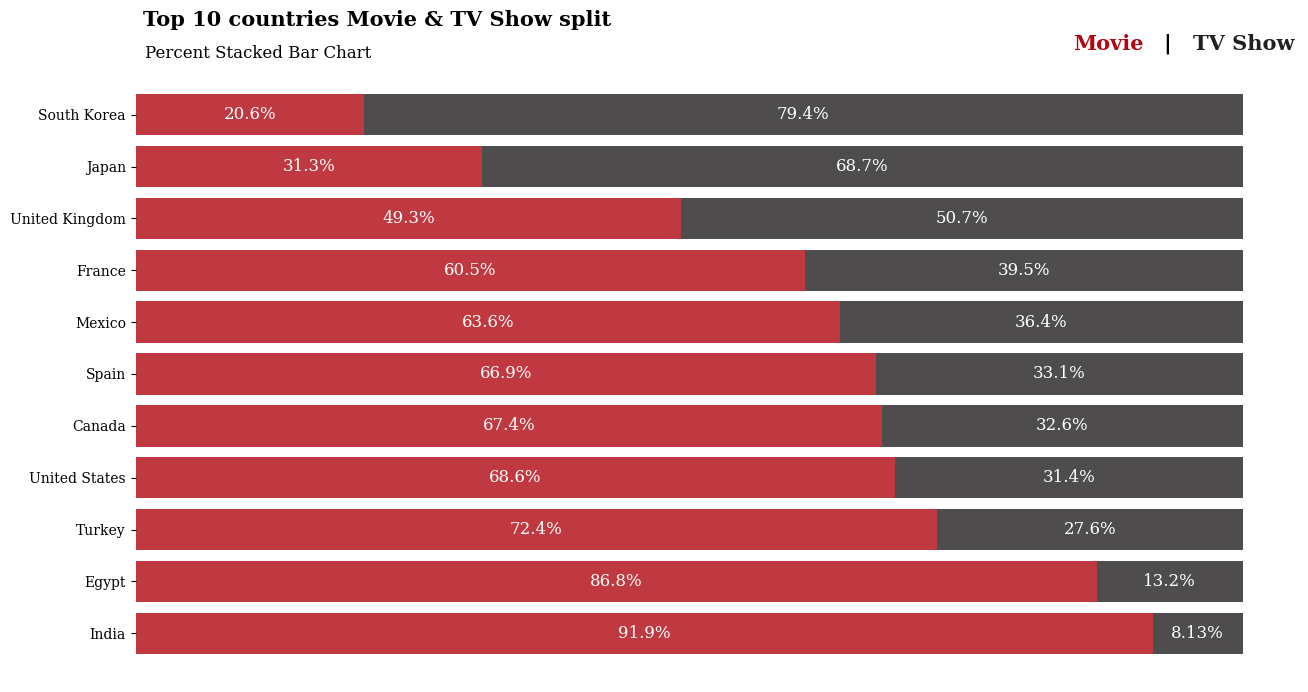

In [130]:
country_order = df['country'].value_counts()[:11].index
dataq2q3 = df[['type','country']].groupby('country')['type'].value_counts().unstack().loc[country_order]
dataq2q3['sum'] = dataq2q3.sum(axis=1)
dataq2q3_ratio = (dataq2q3.T/dataq2q3['sum']).T[['Movie','TV Show']].sort_values(by='Movie',ascending=False)

fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(dataq2q3_ratio.index,dataq2q3_ratio['Movie'],color='#b20710',alpha=0.8,label='Movie')
ax.barh(dataq2q3_ratio.index,dataq2q3_ratio['TV Show'],left=dataq2q3_ratio['Movie'],color='#221f1f', alpha=0.8, label='TV Show')


for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
ax.set_xticks([])
ax.set_yticklabels(dataq2q3_ratio.index,fontfamily='serif')

for i in dataq2q3_ratio.index:
    m_r = dataq2q3_ratio['Movie'][i]*100
    ax.annotate(f'{m_r:.3}%',xy=(dataq2q3_ratio['Movie'][i]/2,i),va='center',ha='center',fontsize=12,fontfamily='serif',color='white')
for i in dataq2q3_ratio.index:
    t_r = dataq2q3_ratio['TV Show'][i]*100
    ax.annotate(f'{t_r:.3}%',xy=(dataq2q3_ratio['Movie'][i]+dataq2q3_ratio['TV Show'][i]/2,i),va='center',ha='center',fontfamily='serif',fontsize=12,color='white')

fig.text(.13,.93,'Top 10 countries Movie & TV Show split',fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.131, 0.89, 'Percent Stacked Bar Chart', fontsize=12,fontfamily='serif')  

fig.text(0.75,0.9,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.81,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.83,0.9,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

plt.show()